# StyleGAN2Ada Experiments

From:

- https://github.com/NVlabs/stylegan2-ada-pytorch


In [8]:
!~\AppData\Local\Programs\Python\Python39\python.exe ./../train.py --outdir=./data/output --data=./data/256image --subset 1 --gpus=1

The system cannot find the path specified.


In [2]:
# !cd ../latent-stylegan2-ada-pytorch
# # !git pull
# !python ./train.py --outdir=/data/imagefolder/stylegan2/output/2 --data=/data/ffhq/images256x256 --subset 100 --gpus=4

Already up to date.


In [2]:
# import numpy as np
# arr = np.array([1,2,3,4])

# np.expand_dims(arr, 0)

array([[1, 2, 3, 4]])

In [69]:
!ls -l /data/imagefolder/stylegan2/output/5/00019-images256x256-auto4-batch128

total 194976
-rw-rw-r-- 1 will will 2614539 Jul 28 20:03 events.out.tfevents.1659018914.104-171-200-188.3453705.0
-rw-rw-r-- 1 will will 1263829 Jul 28 14:35 fakes000000.png
-rw-rw-r-- 1 will will 2957510 Jul 28 14:40 fakes000123.png
-rw-rw-r-- 1 will will 2785264 Jul 28 14:45 fakes000245.png
-rw-rw-r-- 1 will will 2862382 Jul 28 14:50 fakes000368.png
-rw-rw-r-- 1 will will 2889210 Jul 28 14:55 fakes000491.png
-rw-rw-r-- 1 will will 2754827 Jul 28 15:01 fakes000614.png
-rw-rw-r-- 1 will will 2981401 Jul 28 15:06 fakes000737.png
-rw-rw-r-- 1 will will 3014613 Jul 28 15:11 fakes000860.png
-rw-rw-r-- 1 will will 3089253 Jul 28 15:16 fakes000983.png
-rw-rw-r-- 1 will will 3188885 Jul 28 15:21 fakes001106.png
-rw-rw-r-- 1 will will 3023362 Jul 28 15:26 fakes001228.png
-rw-rw-r-- 1 will will 2910476 Jul 28 15:31 fakes001351.png
-rw-rw-r-- 1 will will 3126674 Jul 28 15:36 fakes001474.png
-rw-rw-r-- 1 will will 3015205 Jul 28 15:41 fakes001597.png
-rw-rw-r-- 1 will will 3041580 Jul 28 15:46 fa

In [16]:
!ls -l /data/imagefolder/stylegan2/output/7/00004-images256x256-auto4-kimg7000-batch128

total 3059392
drwxrwxr-x 2 will will      4096 Jul 30 15:35 000000
drwxrwxr-x 2 will will      4096 Jul 30 15:46 000123
drwxrwxr-x 2 will will      4096 Jul 30 15:57 000245
drwxrwxr-x 2 will will      4096 Jul 30 16:07 000368
drwxrwxr-x 2 will will      4096 Jul 30 16:18 000491
drwxrwxr-x 2 will will      4096 Jul 30 16:28 000614
drwxrwxr-x 2 will will      4096 Jul 30 16:39 000737
drwxrwxr-x 2 will will      4096 Jul 30 16:49 000860
drwxrwxr-x 2 will will      4096 Jul 30 17:00 000983
drwxrwxr-x 2 will will      4096 Jul 30 17:10 001106
drwxrwxr-x 2 will will      4096 Jul 30 17:21 001228
-rw-rw-r-- 1 will will    426689 Jul 30 17:22 events.out.tfevents.1659195291.104-171-200-188.22652.0
-rw-rw-r-- 1 will will    678430 Jul 30 15:35 fakes000000.png
-rw-rw-r-- 1 will will   2138130 Jul 30 15:46 fakes000123.png
-rw-rw-r-- 1 will will   1580224 Jul 30 15:57 fakes000245.png
-rw-rw-r-- 1 will will   1547253 Jul 30 16:07 fakes000368.png
-rw-rw-r-- 1 will will   1534075 Jul 30 16:18 fakes000

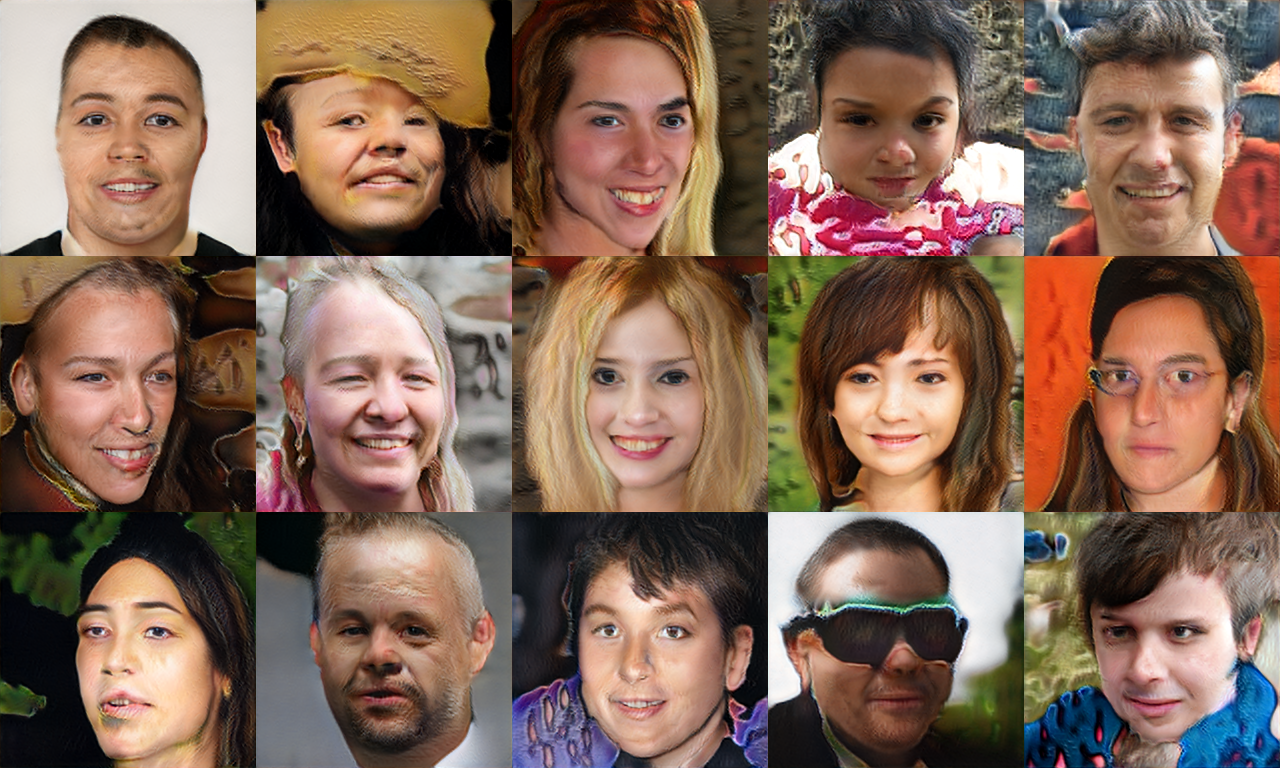

In [17]:
from PIL import Image

path = '/data/imagefolder/stylegan2/output/7/00004-images256x256-auto4-kimg7000-batch128/fakes001228.png'

Image.open(path)

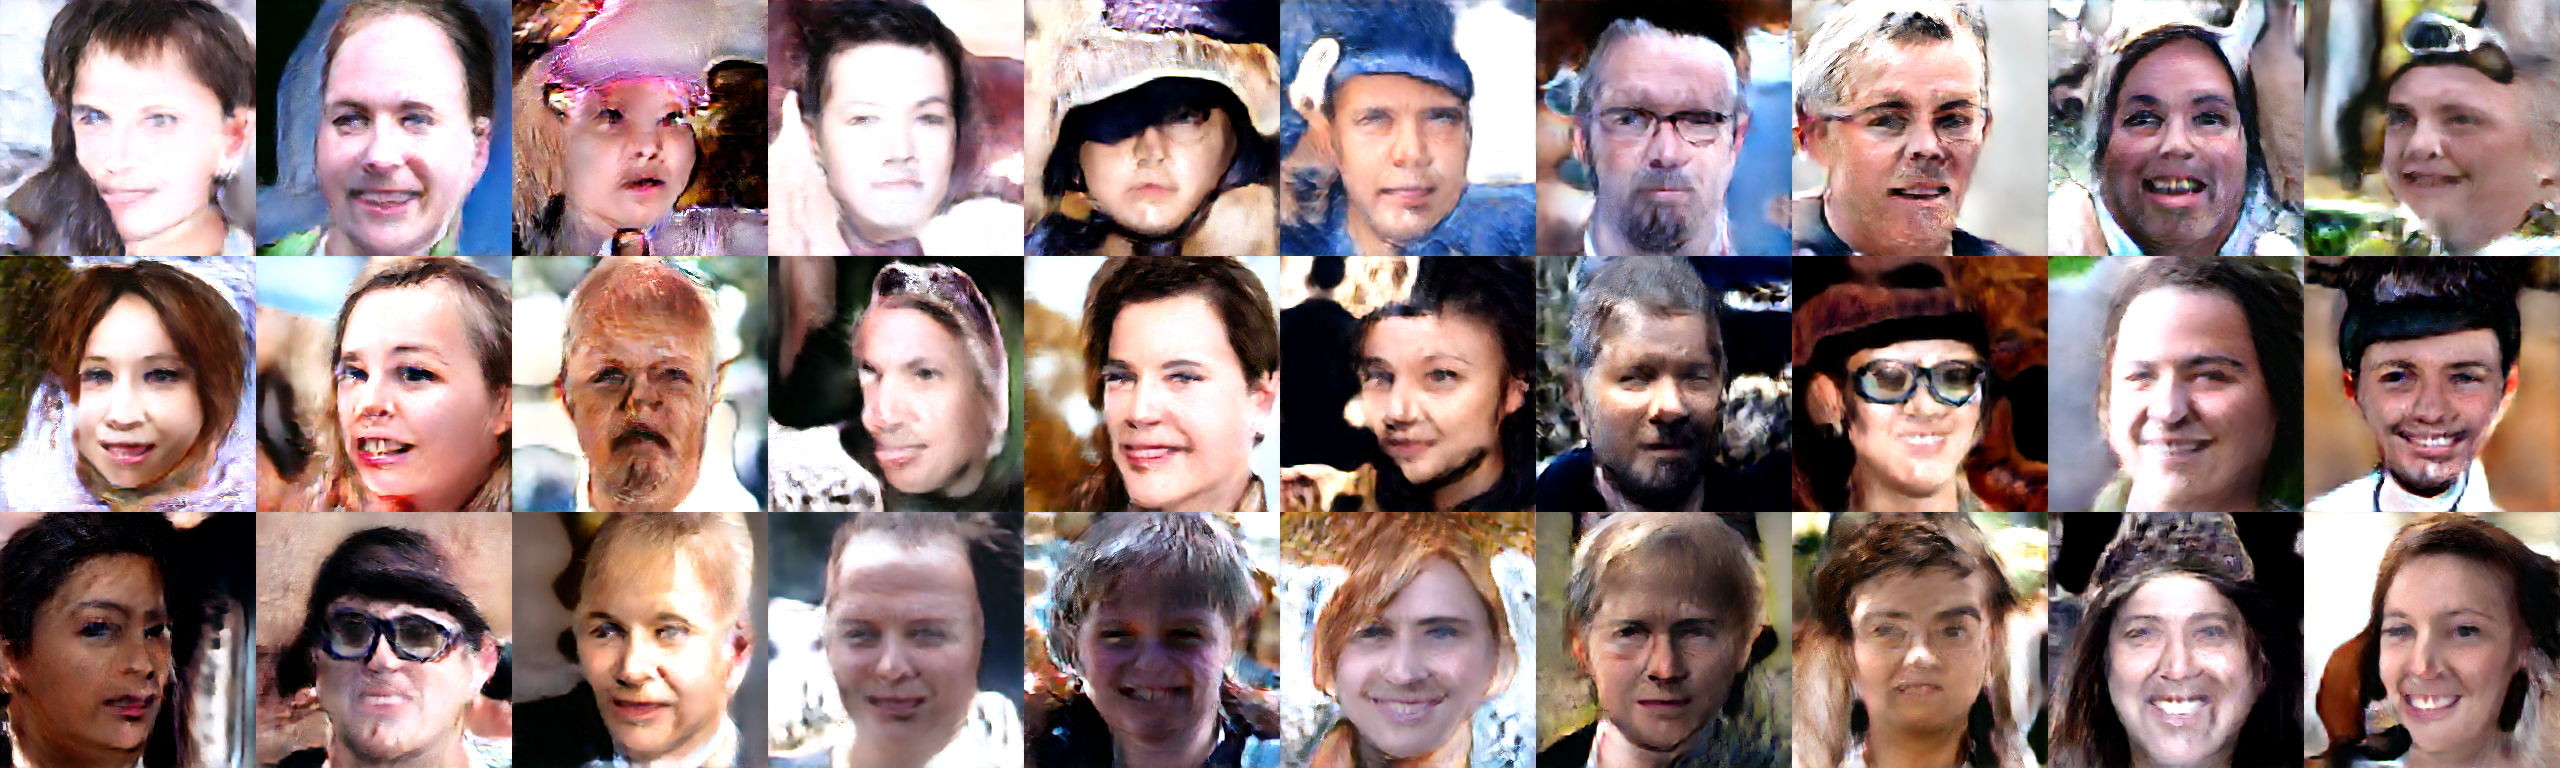

In [72]:
from PIL import Image

path = '/data/imagefolder/stylegan2/output/6/00044-images256x256-latent-auto4-batch128/fakes001433.png'

Image.open(path)

In [7]:
import numpy as np

arr = np.asarray(Image.open(path))
print(arr[0].max(), arr[0].min())

246 196


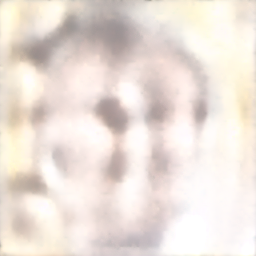

In [3]:
from PIL import Image

path = '/data/imagefolder/stylegan2/output/3/00012-images256x256-subset10-auto4/fakes000241.png'

Image.open(path)

In [1]:
class Wrapper():

    def __init__(self, iterator):
        self.iterator = iterator

    def __iter__(self):
        return self

    def __next__(self):
        elem = next(self.iterator)
        return elem

In [4]:
data = [1,2,3,4,5]
iterator = iter(data)

wrapper = Wrapper(iterator)

next(wrapper)

1

In [1]:
import torch

isinstance(torch.FloatTensor([2,3,4,5]), torch.Tensor)

True

In [33]:
import numpy as np

ngpus = 4
rank = 3

arr = np.array([1,2,3,4,5,6,7,8])

block = len(arr) // ngpus
start = rank * block
end = start + block
end = block * (ngpus - rank - 1)
arr[rank * block: -end if end > 0 else None]

array([7, 8])

In [1]:
min(64, 4)

4

In [ ]:
random.randint(1,255)

In [5]:
[2, *[2,2,2]]

[2, 2, 2, 2]

In [ ]:
import torch 
import random

torch.randint(1, 256, (16, 3, 256, 256)) 

In [1]:
import torchvision.transforms as transforms
import torchvision.datasets as dset

IMAGE_DIR = "/data/imagefolder/ffhq"
OUTPUT_DIR = "/data/imagefolder/latent/klf4/64"
IMAGE_SIZE = 64
WORKERS = 2
BATCH_SIZE = 128

dataset = dset.ImageFolder(root=IMAGE_DIR,
                           transform=transforms.Compose([
                                transforms.ToTensor(),
                                transforms.Resize(IMAGE_SIZE),
                                transforms.CenterCrop(IMAGE_SIZE),
                                transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
                           ]))  


In [4]:
dataset[0][0].shape[1]

64

In [1]:
import torch

img = torch.randint(1, 255 + 1, (16, 3, 256, 256)).type(torch.FloatTensor)

In [5]:
img.permute(0, 2, 3, 1).shape

torch.Size([16, 256, 256, 3])

In [13]:
os.listdir(".")

['data', 'sample.ipynb']

In [16]:
import re
re.find(r'\d+', 'latent_96.npy')

AttributeError: module 're' has no attribute 'find'

In [7]:
int("".join(list(filter(str.isdigit, "awfwfw2332312adffwfaw"))))

2332312

In [12]:
list(map(lambda path : int(path), os.listdir(".")))

ValueError: invalid literal for int() with base 10: 'data'

In [ ]:
li = [1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,11,1,1,1,1,1,1,1,1,1,11,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1, None]
ite = iter(li)
it = iter(lambda *args: next(ite), None)
while True:
    print(next(it))

In [21]:
class InfiniteSampler(torch.utils.data.Sampler):
    def __init__(self, dataset, rank=0, num_replicas=1, shuffle=True, seed=0, window_size=0.5):
        assert len(dataset) > 0
        assert num_replicas > 0
        assert 0 <= rank < num_replicas
        assert 0 <= window_size <= 1
        super().__init__(dataset)
        self.dataset = dataset
        self.rank = rank
        self.num_replicas = num_replicas
        self.shuffle = shuffle
        self.seed = seed
        self.window_size = window_size

    def __iter__(self):
        order = np.arange(len(self.dataset))
        rnd = None
        window = 0
        if self.shuffle:
            rnd = np.random.RandomState(self.seed)
            rnd.shuffle(order)
            window = int(np.rint(order.size * self.window_size))

        idx = 0
        while True:
            i = idx % order.size
            if idx % self.num_replicas == self.rank:
                yield order[i]
            if window >= 2:
                j = (i - rnd.randint(window)) % order.size
                order[i], order[j] = order[j], order[i]
            idx += 1

In [23]:
import torch
import numpy as np

li = [1,2,3,4]

class Simp:
    def __init__(self):
        print("")

    def __iter__(self):
        return self
    def __len__(self):
        return 4

simp = InfiniteSampler(li)

it = iter(torch.utils.data.DataLoader(dataset=li, batch_size=1, sampler=simp))

while True:
    next(it)

KeyboardInterrupt: 

In [36]:
import datetime
import time

past = datetime.datetime.now()
time.sleep(3)
now = datetime.datetime.now()

print(f"Diff: {round((now - past).total_seconds() / 60, 0)}")

Diff: 0.0


In [77]:
import torch
torch.randint(1, 256, (16, 3, 256, 256)).permute(0, 2, 3, 1).shape

torch.Size([16, 256, 256, 3])

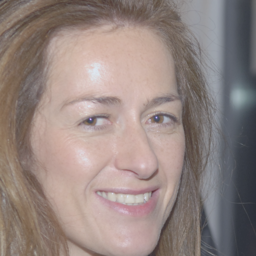

In [52]:
from PIL import Image
import numpy as np
import torchvision.transforms as transforms

img = Image.open("/data/ffhq/images256x256/40058_256.png")

tsfm = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

img = ((((tsfm(img).permute(1,2,0).numpy() / 3) + 1) / 2) * 255).astype(np.uint8)
Image.fromarray(img)

In [53]:
opts = {
    "dataset_kwargs": "lol",
}
opts.dataset_kwargs

AttributeError: 'dict' object has no attribute 'dataset_kwargs'